# Problema de clasificación


Sacamos el dataset de la pagina oficial de scikit-learn

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Breast cancer wisconsin (diagnostic) dataset

Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

In [2]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

In [3]:
# Convierto el dataset al formato DataFrame:
data_df = pd.DataFrame(data)
target_serie = pd.DataFrame(target)

# Junto todo:
dataset = pd.concat([data_df, target_serie], axis = 1)
dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
# Le agregamos el headline a las columnas:
cols = breast_cancer.feature_names
estado = np.array(["state"])
headlines = np.concatenate((cols, estado), axis = 0)


In [5]:
dataset.columns = headlines
state1= dataset.state
dataset.drop(columns=['state'])
dataset = pd.concat([state1, dataset], axis=1)
dataset = dataset.loc[:,~dataset.columns.duplicated()]
#Cambiamos para que los malignos sean los 1 y los benignos 0 
dataset['state'] = dataset['state'].map({1 : 0, 0 : 1})
dataset

,state,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#contamos la cantidad de celulas Malignas(0) y Benignas(1)
dataset.state.value_counts()


0    357
1    212
Name: state, dtype: int64

/Users/franciscoolmos/Proyectos/Codecademy/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

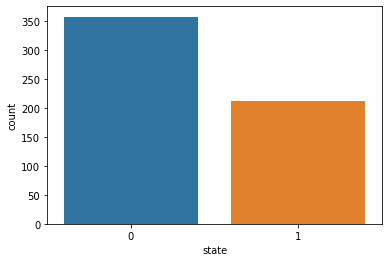

In [7]:
sns.countplot(dataset.state, label='count')

In [9]:
malignos = dataset[dataset.state == 1]
benignos = dataset[dataset.state == 0]
print(np.mean(malignos), np.mean(benignos))


state                         1.000000
mean radius                  17.462830
mean texture                 21.604906
mean perimeter              115.365377
mean area                   978.376415
mean smoothness               0.102898
mean compactness              0.145188
mean concavity                0.160775
mean concave points           0.087990
mean symmetry                 0.192909
mean fractal dimension        0.062680
radius error                  0.609083
texture error                 1.210915
perimeter error               4.323929
area error                   72.672406
smoothness error              0.006780
compactness error             0.032281
concavity error               0.041824
concave points error          0.015060
symmetry error                0.020472
fractal dimension error       0.004062
worst radius                 21.134811
worst texture                29.318208
worst perimeter             141.370330
worst area                 1422.286321
worst smoothness         

/Users/franciscoolmos/Proyectos/Codecademy/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
dataset.isna().sum()

state                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
print(breast_cancer.data)
print(breast_cancer.feature_names)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(breast_cancer.target)
print(breast_cancer.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
len(breast_cancer.target)

569

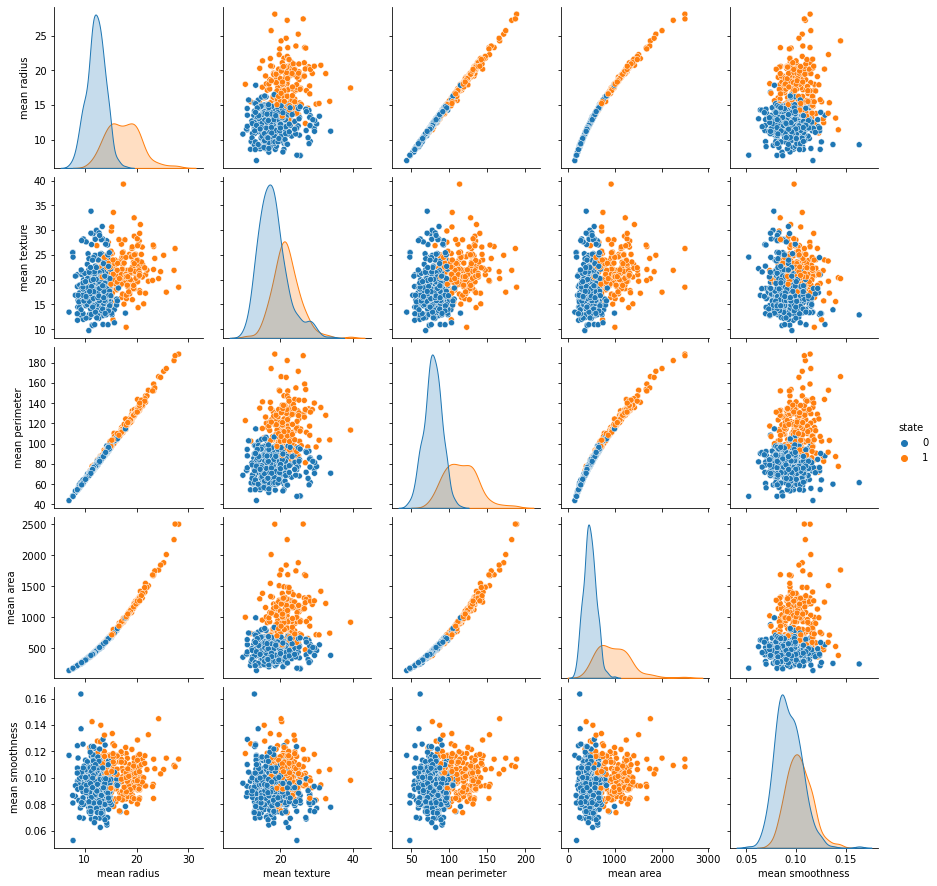

In [ ]:
sns.pairplot(dataset.iloc[:,0:6], hue='state')

<AxesSubplot:>

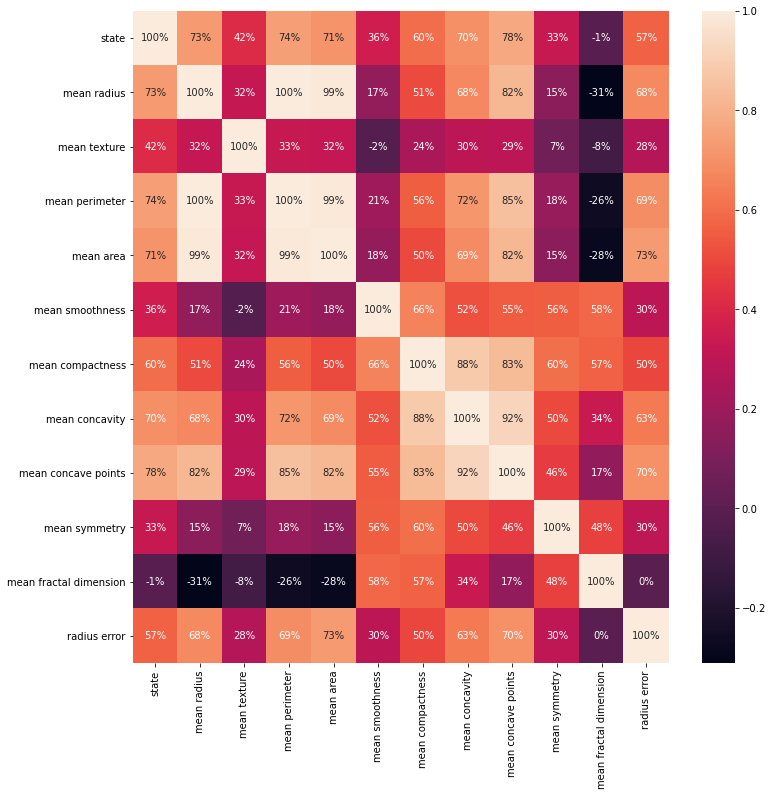

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.iloc[:, 0:12].corr(), annot=True, fmt='.0%')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.25, random_state = 100)

In [ ]:
#escalar la data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_data = sc.fit_transform(training_data)
validation_data = sc.fit_transform(validation_data)
training_data

array([[-0.40016643,  0.34471677, -0.37980495, ..., -0.04438005,
        -1.13586608,  0.06583523],
       [-0.09151733, -0.14480458, -0.10586151, ...,  0.23300959,
        -0.05034187,  0.37866712],
       [-1.07747972, -0.63903286, -1.05841863, ..., -0.46542342,
        -0.32564336,  0.63582067],
       ...,
       [-0.67737904, -0.52371293, -0.73160161, ..., -1.09629114,
        -0.25594678, -0.88758452],
       [-0.3344356 , -0.3048404 , -0.33650689, ..., -0.5284947 ,
        -0.17231088, -0.26019873],
       [-1.35326341, -1.26976229, -1.30363548, ..., -0.63139231,
         1.39934696,  0.35054095]])

In [ ]:
print(len(training_data))
print(len(training_labels))

426
426


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classifier.score(validation_data, validation_labels))

0.951048951048951


In [ ]:
accuracies_KNN = []
accuracies_training_KNN = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    accuracies_KNN.append(classifier.score(validation_data, validation_labels))
    accuracies_training_KNN.append(classifier.score(training_data, training_labels))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
k_list = range(1,101)

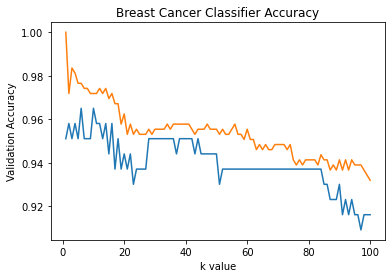

In [ ]:
plt.plot(k_list, accuracies_KNN)
plt.plot(k_list, accuracies_training_KNN)
plt.title("Breast Cancer Classifier Accuracy")
plt.xlabel("k value")
plt.ylabel("Validation Accuracy")
plt.show()

In [ ]:
max(accuracies_KNN)

0.965034965034965

In [ ]:
YpredKnn = classifier.predict(validation_data)

In [ ]:
conf_mat = confusion_matrix(validation_labels, YpredKnn)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[1,1])
print('\nTrue Negatives(TN) = ', conf_mat[0,0])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])


Confusion matrix

 [[44 12]
 [ 0 87]]

True Positives(TP) =  87

True Negatives(TN) =  44

False Positives(FP) =  12

False Negatives(FN) =  0


<AxesSubplot:>

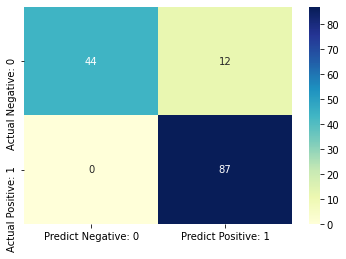

In [ ]:
conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')

## *Naive Bayes*

### Vamos a aplicar Naive Bayes para clasificar los casos según la columna "state" (target) y hallar nuestro escenario baseline:

#### 0 = maligno ; 1 = benigno

In [ ]:
dataset.head(5)

,state,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset.columns

Index(['state', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
# Definimos X e Y:
X = dataset.drop(["state"], axis = 1)
Y = dataset.state

In [ ]:
# Instanciamos el modelo:
GNB = GaussianNB()
# Spliteamos en train y test:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# Fitteo:
GNB.fit(Xtrain, Ytrain)
# Predict:
Ypred = GNB.predict(Xtest)
Ypred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Evaluamos la performance:
accuracy_NB = accuracy_score(Ytest, Ypred)
accuracy_NB

0.9239766081871345

In [ ]:
conf_mat = confusion_matrix(Ytest, Ypred)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[1,1])
print('\nTrue Negatives(TN) = ', conf_mat[0,0])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[99  3]
 [10 59]]

True Positives(TP) =  59

True Negatives(TN) =  99

False Positives(FP) =  3

False Negatives(FN) =  10


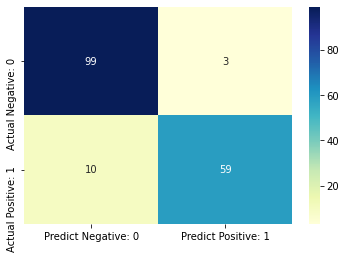

In [ ]:
conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');

Es decir, el modelo es bastante bueno para predecir casos positivos (benignos): es decir, no confunde casos no alarmantes (tumores benignos) por preocupantes (malignos); sin embargo, no es tan bueno para predecir los casos preocupantes: en el 14% de los casos malignos (10 de 69) los predijo como benignos cuando no lo son. 

In [ ]:
10/69

0.14492753623188406

## *Regresión logística*

### Vamos a aplicar un regresor logístico para compararlo con los resultados de KNN y Naive Bayes:

In [ ]:
dataset.shape

(569, 31)

In [ ]:
# Balance del dataset:
dataset.state.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: state, dtype: float64

In [ ]:
Ytrain.mean(), Ytest.mean()

(0.3592964824120603, 0.40350877192982454)

In [ ]:
# Instanciamos el modelo:
LR = LogisticRegression()

# Escalamos los datos:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Entrenamos:
LR.fit(Xtrain_scaled, Ytrain)

LogisticRegression()

In [ ]:
# Escalamos Xtest para predecimos valores:
Xtest_scaled = scaler.transform(Xtest)

# Predecimos:
Ypred = LR.predict(Xtest_scaled)

In [ ]:
# Creamos la matriz de confusión para evaluar resultados:
conf_mat = confusion_matrix(Ytest, Ypred)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[1,1])
print('\nTrue Negatives(TN) = ', conf_mat[0,0])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[102   0]
 [  6  63]]

True Positives(TP) =  63

True Negatives(TN) =  102

False Positives(FP) =  0

False Negatives(FN) =  6


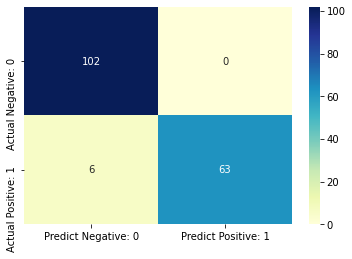

In [ ]:
conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');

In [ ]:
# Veamos el accuracy
from sklearn.metrics import accuracy_score
accuracy_RL = accuracy_score(Ytest, Ypred)
accuracy_RL

0.9649122807017544

### Entonces:

In [ ]:
print("Accuracy KNN = ", max(accuracies_KNN),"\n")
print("Accuracy Naive Bayes = ", accuracy_NB,"\n")
print("Accuracy Regresión Logística = ", accuracy_RL)

Accuracy KNN =  0.965034965034965 

Accuracy Naive Bayes =  0.9239766081871345 

Accuracy Regresión Logística =  0.9649122807017544


In [ ]:
print("Recall KNN = ", 87/(87+0),"\n")
print("Recall Naive Bayes = ", 59/(59+10),"\n")
print("Recall Regresión Logística = ", 63/(63+6))

Recall KNN =  1.0 

Recall Naive Bayes =  0.855072463768116 

Recall Regresión Logística =  0.9130434782608695
